In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import transbigdata as tbd
import pybdshadow


<AxesSubplot:>

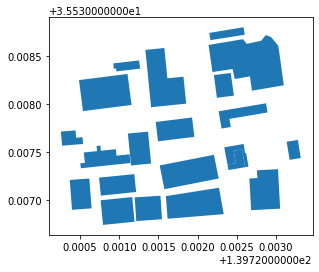

In [2]:

# Read building data
buildings = gpd.read_file(r'../example/data/bd_demo.json')
buildings = pybdshadow.bd_preprocess(buildings)
buildings = buildings[(buildings['x'] > 139.720311) &
                      (buildings['x'] < 139.723311) &
                      (buildings['y'] > 35.532816) &
                      (buildings['y'] < 35.540816)]
buildings.plot()

# Roof sunshine

In [ ]:
sunshine = pybdshadow.cal_sunshine(buildings, day='2022-01-01', roof=True, accuracy=1, gap=1800)

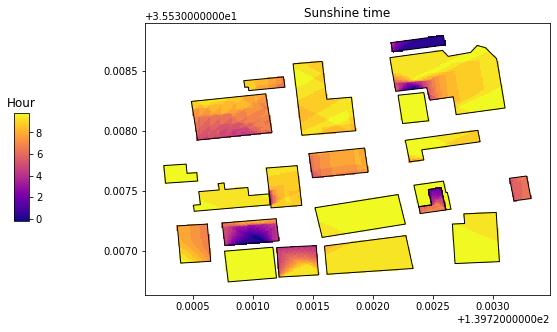

In [11]:


#Visualize buildings and sunshine using matplotlib
import matplotlib.pyplot as plt
fig = plt.figure(1,(10,5))
ax = plt.subplot(111)

cax = plt.axes([0.05, 0.33, 0.02, 0.3])
plt.title('Hour')

#Ground sunshine 
sunshine.plot(ax = ax,cmap = 'plasma',column ='Hour',alpha = 1,legend = True,cax = cax,)

#Buildings
buildings.plot(ax = ax,edgecolor='k',facecolor=(0,0,0,0))


plt.sca(ax)
plt.title('Sunshine time')

plt.show()

# Ground sunshine

In [12]:
sunshine = pybdshadow.cal_sunshine(buildings, day='2022-01-01', roof=False, accuracy=1, gap=1800)


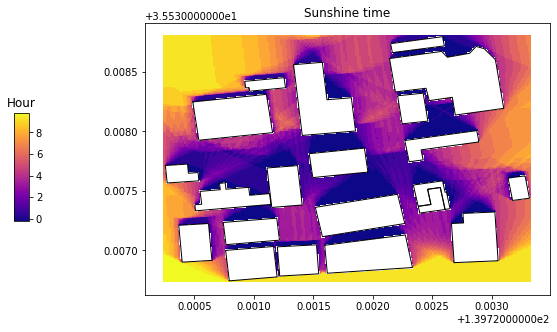

In [13]:
#Visualize buildings and sunshine using matplotlib
import matplotlib.pyplot as plt
fig = plt.figure(1,(10,5))
ax = plt.subplot(111)

cax = plt.axes([0.05, 0.33, 0.02, 0.3])
plt.title('Hour')

#Ground sunshine 
sunshine.plot(ax = ax,cmap = 'plasma',column ='Hour',alpha = 1,legend = True,cax = cax,)

#Buildings
buildings.plot(ax = ax,edgecolor='k',facecolor=(0,0,0,0))


plt.sca(ax)
plt.title('Sunshine time')

plt.show()

Change the date

In [14]:
sunshine = pybdshadow.cal_sunshine(buildings, day='2022-10-01', roof=False, accuracy=1, gap=1800)


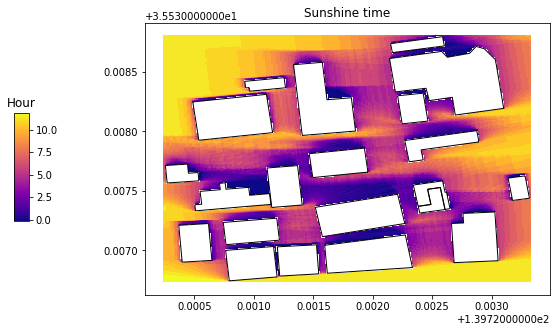

In [15]:
#Visualize buildings and sunshine using matplotlib
import matplotlib.pyplot as plt
fig = plt.figure(1,(10,5))
ax = plt.subplot(111)

cax = plt.axes([0.05, 0.33, 0.02, 0.3])
plt.title('Hour')

#Ground sunshine 
sunshine.plot(ax = ax,cmap = 'plasma',column ='Hour',alpha = 1,legend = True,cax = cax,)

#Buildings
buildings.plot(ax = ax,edgecolor='k',facecolor=(0,0,0,0))


plt.sca(ax)
plt.title('Sunshine time')

plt.show()

# Self-define area analysis

In [17]:
bounds = (139.72125658, 35.536744, 139.72231764, 35.537797)

In [19]:
grids,_ = tbd.area_to_grid(bounds,accuracy=1)

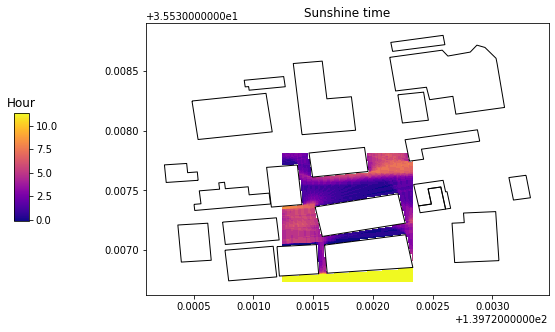

In [20]:
sunshine = pybdshadow.cal_sunshine(buildings, day='2022-10-01',grids = grids, roof=False, accuracy=1, gap=1800)

#Visualize buildings and sunshine using matplotlib
import matplotlib.pyplot as plt
fig = plt.figure(1,(10,5))
ax = plt.subplot(111)

cax = plt.axes([0.05, 0.33, 0.02, 0.3])
plt.title('Hour')

#Ground sunshine 
sunshine.plot(ax = ax,cmap = 'plasma',column ='Hour',alpha = 1,legend = True,cax = cax,)

#Buildings
buildings.plot(ax = ax,edgecolor='k',facecolor=(0,0,0,0))


plt.sca(ax)
plt.title('Sunshine time')

plt.show()